In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [28]:
def load_prd_temperature_data(base_path):
    data = {}
    prod_root = os.path.join(base_path, 'Production')
    for q_folder in os.listdir(prod_root):
        q_path = os.path.join(prod_root, q_folder)

        for model_dir in os.listdir(q_path):
            model_path = os.path.join(q_path, model_dir)

            # extract model name and optional direction tag
            parts = [p.strip() for p in model_dir.split(',')]
            model_name = parts[0]             # model name
            q_key = q_folder                  # flow scenario
            if len(parts) > 1:
                q_key += f', {parts[1]}'  # flow + direction

            file_path = os.path.join(model_path, 'time_data.xlsx')

            df = pd.read_excel(
                file_path,
                usecols=['time', 'PRD : temperature (K)']
            )

            data.setdefault(model_name, {})[q_key] = df

    return data


def plot_prd_temperature_for_model(data, model_name):
    plt.figure(figsize=(8, 5))
    for q_key, df in sorted(data[model_name].items()):
        plt.plot(
            df['time']/365,
            df['PRD : temperature (K)'],
            label=q_key
        )
    plt.xlabel('Time (years)')
    plt.ylabel('PRD : temperature (K)')
    plt.title(f"PRD: Temperature vs Time for {model_name}")
    plt.legend(title='Background flowrate, direction')
    plt.tight_layout()
    plt.show()

In [ ]:
data = load_prd_temperature_data('output'  )

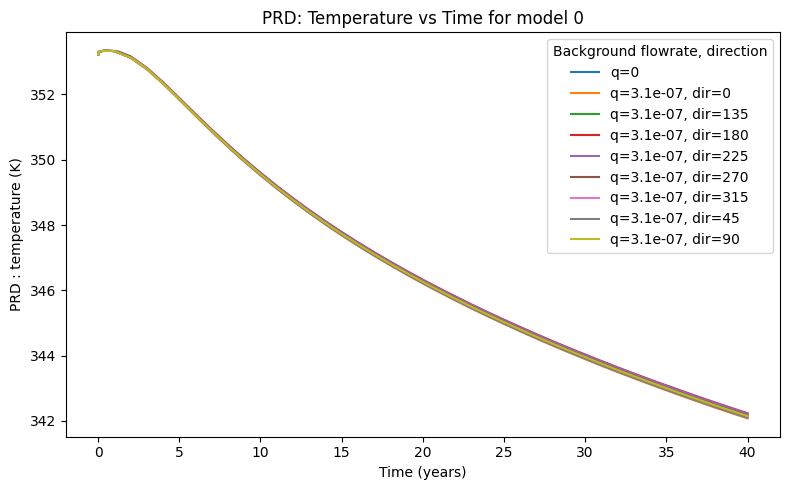

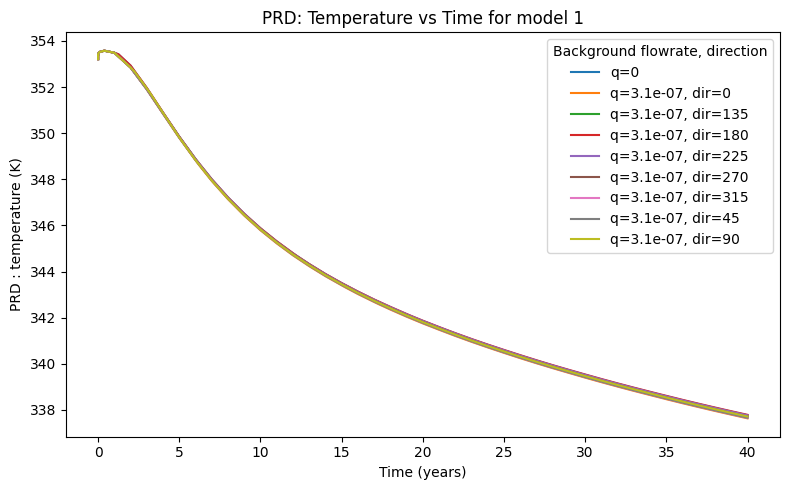

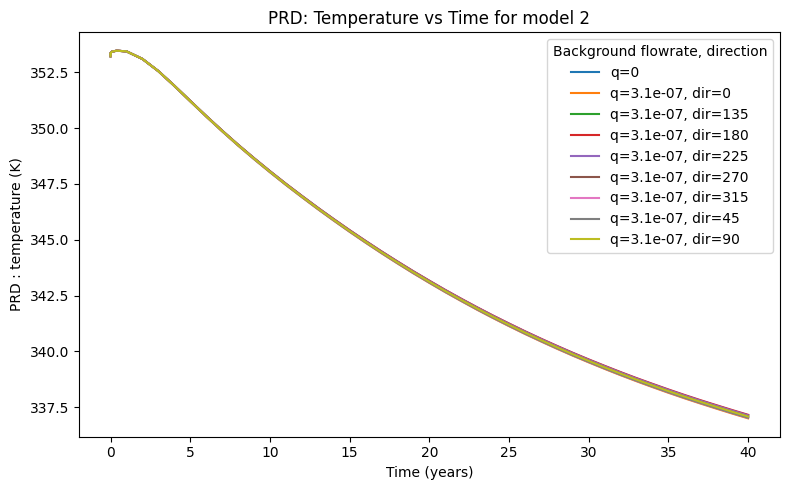

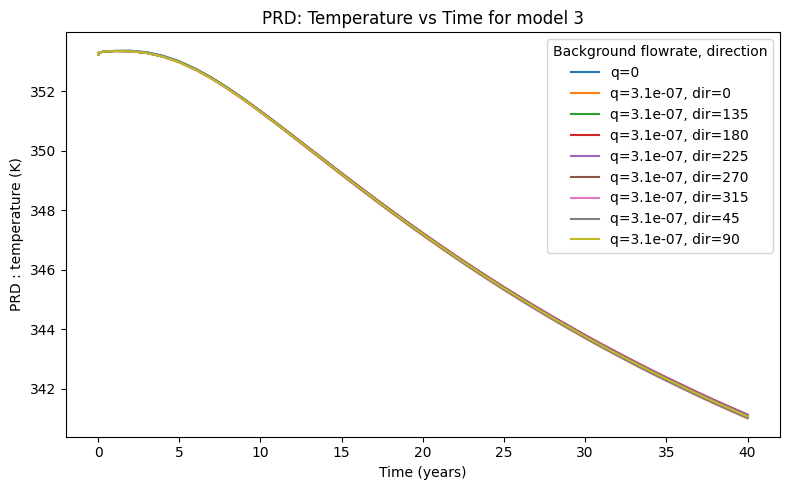

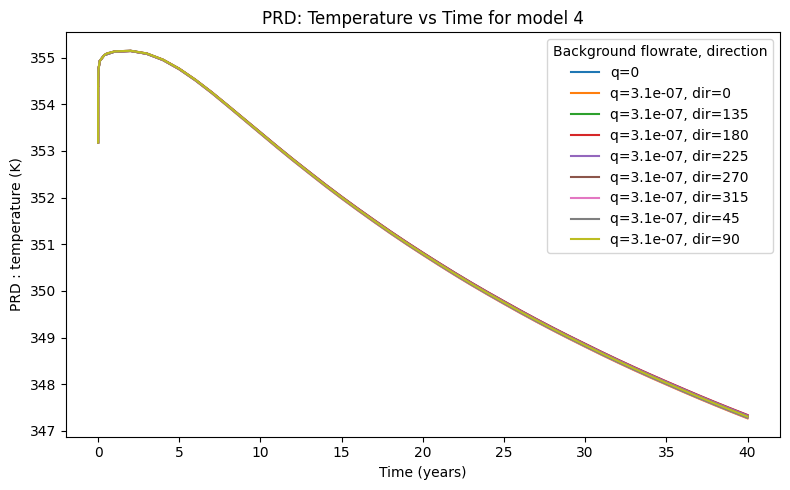

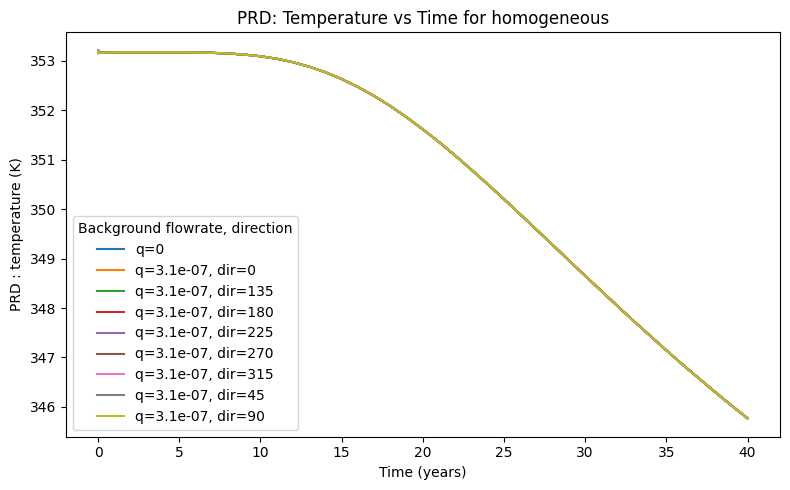

In [30]:
plot_prd_temperature_for_model(data, 'model 0')
plot_prd_temperature_for_model(data, 'model 1')
plot_prd_temperature_for_model(data, 'model 2')
plot_prd_temperature_for_model(data, 'model 3')
plot_prd_temperature_for_model(data, 'model 4')
plot_prd_temperature_for_model(data, 'homogeneous')

In [31]:
def plot_prd_temp_difference(data, model_name):
    model_data = data.get(model_name)

    df0 = model_data.get('q=0')

    t0 = df0['time'].values
    T0 = df0['PRD : temperature (K)'].values

    plt.figure(figsize=(12, 5))
    for q_key, df in sorted(model_data.items()):
        if q_key == 'q=0':
            continue
        t = df['time'].values
        T = df['PRD : temperature (K)'].values

        T0_interp = np.interp(t, t0, T0)
        dT = T - T0_interp

        plt.plot(t/365, dT, label=q_key)

    plt.xlabel('Time (years)')
    plt.ylabel(r'$\Delta T$ (K) relative to q=0')
    plt.title(f'PRD Temperature Difference for {model_name}')
    plt.legend(title='Background flowrate, direction', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


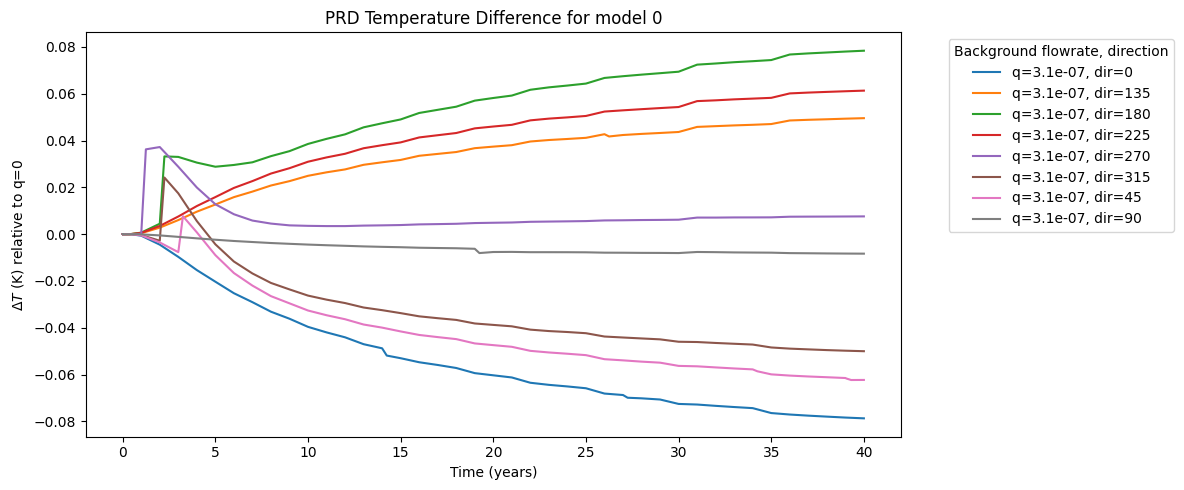

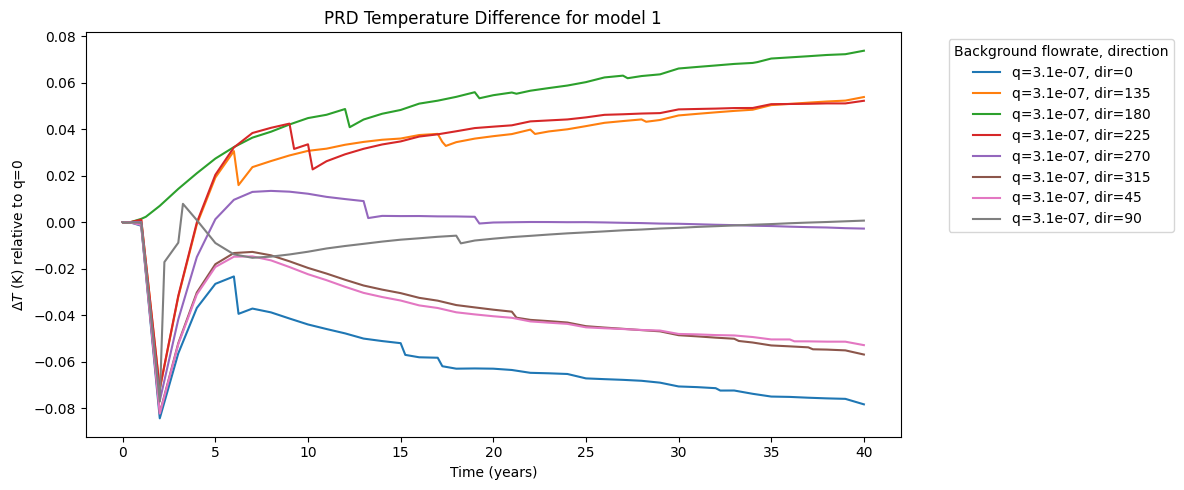

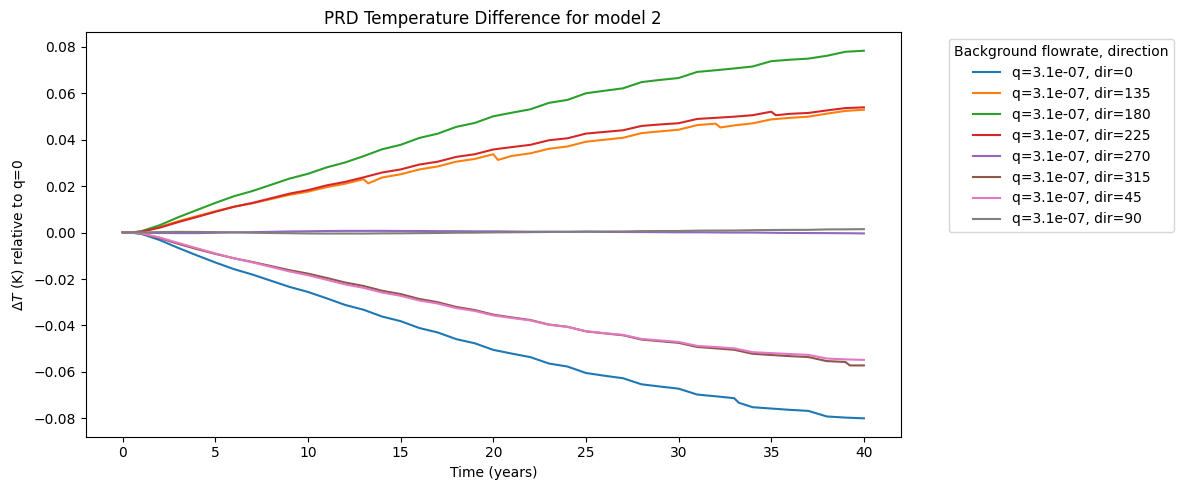

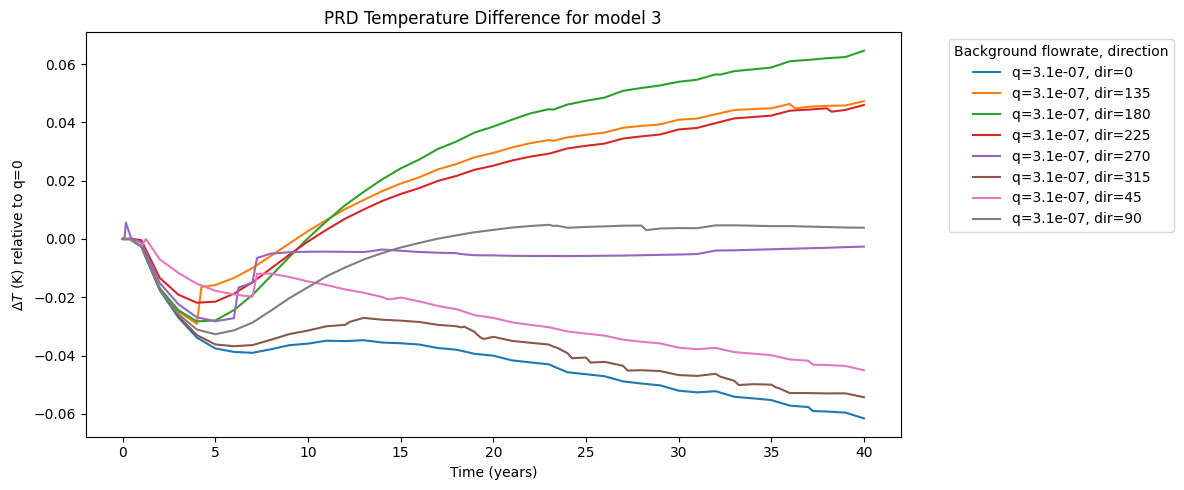

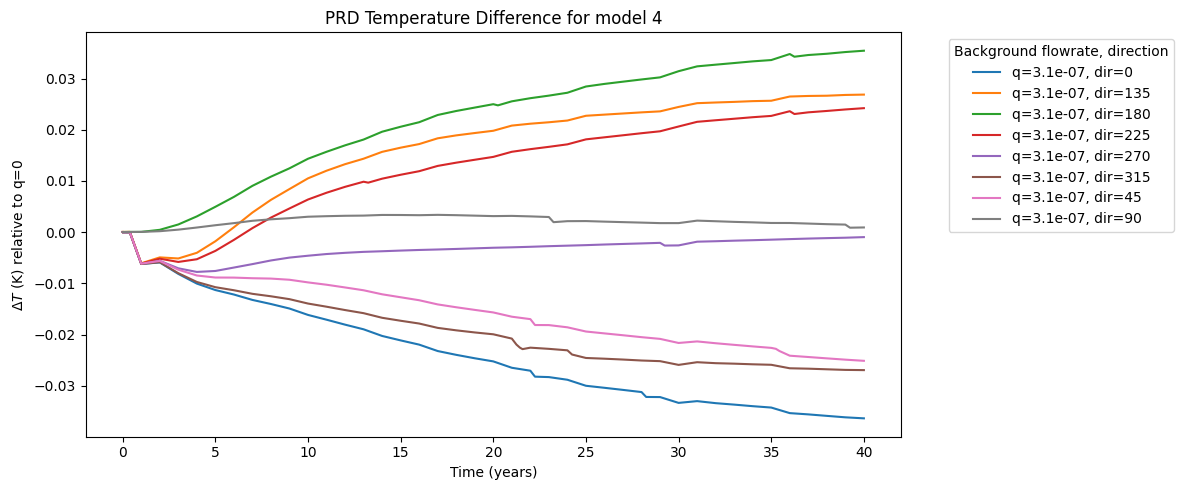

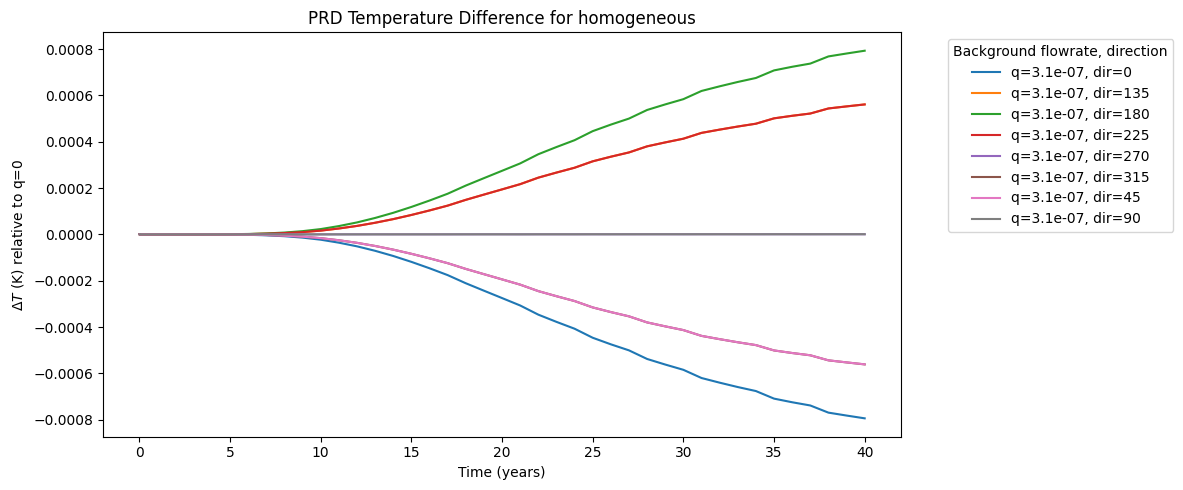

In [32]:
plot_prd_temp_difference(data, 'model 0')
plot_prd_temp_difference(data, 'model 1')
plot_prd_temp_difference(data, 'model 2')
plot_prd_temp_difference(data, 'model 3')
plot_prd_temp_difference(data, 'model 4')
plot_prd_temp_difference(data, 'homogeneous')